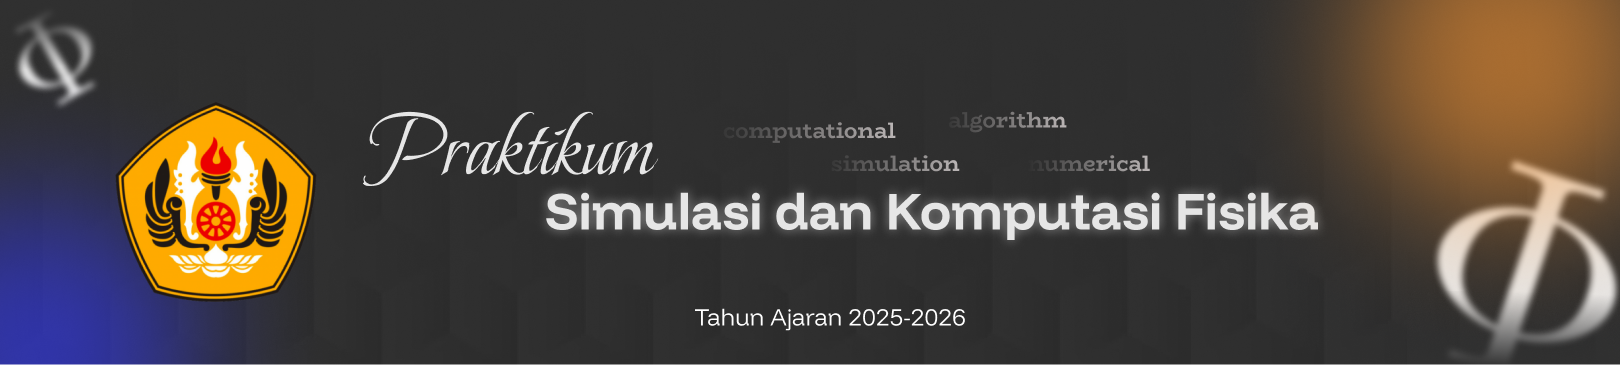

---

<div align="center">
   <h3></h3>
   <h1 text="bold"><b>M-1 - Model Persamaan Diferensial</b></h1>
</div>

<p align="center">Nama | NPM </p>
<p align="center">Nama Asisten</p>

---

## **I. Tujuan Praktikum**
Melalui modul ini diharapkan Mahasiswa mampu untuk:
1. Mengidentifikasi model fisika yang direpresentasikan oleh persamaan diferensial tunggal dan terkopel.
2. Menyusun solusi numerik dari persamaan diferensial tersebut secara komputasi.
3. Mengimplementasikan solusi numerik ke dalam program Python.
4. Melakukan visualisasi dan simulasi hasil perhitungan.

---

## **II. Teori**
### 1. Pendahuluan
Banyak fenomena fisika dapat dijelaskan melalui hubungan antara perubahan suatu besaran terhadap waktu atau ruang. Hubungan ini secara matematis dinyatakan dalam bentuk persamaan diferensial. Contoh umum meliputi gerak partikel, peluruhan radioaktif, osilasi mekanik, aliran panas, hingga dinamika populasi.

Dalam fisika komputasi, tujuan utama bukan mencari solusi analitik persamaan diferensial, melainkan memodelkan perilaku fisis sistem melalui solusi numerik yang kemudian disimulasikan dan divisualisasikan menggunakan komputer.

### 2. Persamaan Diferensial dalam Pemodelan Fisika
#### 2.1 Persamaan Diferensial Tunggal
Persamaan diferensial tunggal (PDT) melibatkan satu variabel tak bebas yang bergantung pada satu variabel bebas, umumnya waktu. Bentuk umum PDT orde pertama dapat dituliskan sebagai:

$$\frac{dy}{dx} = f(y,t)$$

Dalam fisika, bentuk ini sering muncul pada peluruhan radioaktif, gerak partikel satu dimensi dll.

#### 2.2 Persamaan Diferensial Terkopel
Pada banyak sistem fisika, perubahan suatu besaran bergantung pada besaran lain secara simultan. Sistem seperti ini dinyatakan dalam bentuk persamaan diferensial terkopel:

$$\frac{dx}{dt}=f(x,y,t) \frac{dy}{dt}=g(x,y,t)$$

Persamaan terkopel memungkinkan analisis perilaku sistem secara keseluruhan, bukan hanya variabel tunggal.

### 3. Solusi Numerik dalam Fisika Komputasi
Tidak semua persamaan diferensial memiliki solusi analitik. Bahkan ketika solusi analitik tersedia, pendekatan numerik sering lebih fleksibel untuk:
- Sistem nonlinear
- Kondisi awal yang kompleks
- Studi perilaku jangka panjang

Dalam fisika komputasi, solusi numerik diperoleh dengan mendiskritkan variabel waktu atau ruang dan menghitung nilai besaran fisis secara bertahap. Pendekatan ini memungkinkan simulasi dinamika sistem secara eksplisit.

**Contoh Kasus-1 Persamaan Diferensial Tunggal: Peluruhan Radioaktif**
Peluruhan radioaktif mengikuti persamaan:

$$\frac{dN}{dt} = -\lambda N$$

dengan
- N(t): jumlah inti radioaktif
- $\lambda$ : konstanta peluruhan

Persamaan ini menyatakan bahwa laju peluruhan sebanding dengan jumlah inti yang masih ada.

Solusi analitik persamaan di atas adalah:

$$N(t) = N_0 e^{-\lambda t}$$

Komputer tidak dapat bekerja dengan waktu kontinu, sehingga waktu dibagi menjadi langkah-langkah diskrit:
$$ t0,t1,t2, … $$
dengan
$$t_{n+1}=t_n + Δt$$
di mana t adalah Langkah waktu.

Turunan pertama terhadap waktu didekati dengan beda hingga maju (*forward difference*)

$$\frac{dN}{dt}|_{t=t_n} \approx \frac{N(t_n +\Delta t) - N(t_n)}{\Delta t}$$

Dengan
- $N^n = N(t_n)$
- $N^{n+1} = N(t_{n+1})$

Substitusi pendekatan turunan ke persamaan peluruhan
$$\frac{N(t_n + Δt)-N(t_n)}{\Delta t}=-\lambda N(t_n)$$

Susun ulang persamaan untuk mendapatkan nilai $N(t_n + Δt)$
$$N(t_n + \Delta t)=N(t_n)-\lambda N(t_n)t$$
$$N(t_n + \lambda t)= N(t_n)(1-\lambda t)$$

atau dalam bentuk indeks menjadi
$$N(n+1)=N(n)(1-λ\Delta t)$$

Implementasi pendekatan numerik menjadi bahasa python:

**Kode-1.1**
```pyhton
# 1. Import Pustaka
import numpy as np
import matplotlib.pyplot as plt

# 2. Parameter fisika dan numerik
# Parameter fisika
lambda_decay = 0.5      # konstanta peluruhan
N0 = 100                # jumlah inti awal

# Parameter simulasi
t_max = 10              # waktu maksimum
dt = 0.01               # langkah waktu

# 3. Diskritisasi waktu
t = np.arange(0,t_max+dt,dt)
N = np.zeros(len(t))

# Kondisi awal
N[0] = N0

# 4. Implementasi solusi numerik (Euler)
for i in range(len(t)-1):
    N[i+1] = N[i] - lambda_decay*N[i]*dt

# 5. Visualisasi hasil simulasi
plt.figure()
plt.plot(t, N)
plt.xlabel("Waktu")
plt.ylabel("Jumlah inti N")
plt.title("Simulasi Peluruhan Radioaktif")
plt.grid()
plt.show()

```


**Contoh Kasus 2: Persamaan Diferensial Terkopel: Osilator Harmonik Sederhana**

Gerak osilator harmonik dapat dinyatakan sebagai sistem persamaan terkopel:

$$
\frac{dx}{dt} = v; \frac{dv}{dt} = -\omega^2 x
$$


Dengan menggunakan pendekatan numerik (Metode Euler), persamaannya menjadi:

$$x_{n+1} = x_n + v_n \Delta t$$
$$v_{n+1} = v_n + (-\omega^2 x_n) \Delta t$$



**Contoh Sistem Persamaan Diferensial Campuran**
Misalkan diberikan sistem seperti berikut:

$$\begin{cases} \frac{dx}{dt} = -ax + y & \text{(Orde 1)} \\ \frac{d^2y}{dt^2} = -by + cx & \text{(Orde 2)} \end{cases}$$

 Agar dapat disimulasikan secara numerik, persamaan orde dua perlu diubah menjadi dua persamaan orde satu dengan memperkenalkan variabel baru $$z = \frac{dy}{dt}$$.

Sehingga sistem menjadi:

$$\begin{cases} \frac{dx}{dt} = -ax + y \\ \frac{dy}{dt} = z \\ \frac{dz}{dt} = -by + cx \end{cases}$$



** Contoh Sistem Persamaan Diferensial Campuran **
Misalkan diberikan sistem seperti berikut:

$$\begin{cases} \frac{dx}{dt} = -ax + y & \text{(Orde 1)} \\ \frac{d^2y}{dt^2} = -by + cx & \text{(Orde 2)} \end{cases}$$

 Agar dapat disimulasikan secara numerik, persamaan orde dua perlu diubah menjadi dua persamaan orde satu dengan memperkenalkan variabel baru $z = \frac{dy}{dt}$.

Sehingga sistem menjadi:

$$\begin{cases} \frac{dx}{dt} = -ax + y \\ \frac{dy}{dt} = z \\ \frac{dz}{dt} = -by + cx \end{cases}$$

Semua sistem di atas akhirnya ditulis sebagai sistem persamaan orde satu, dengan pendekatan iterasi sebagai berikut:

$$x_{n+1} = x_n + (-ax_n + y_n) \Delta t$$
$$y_{n+1} = y_n + z_n \Delta t$$
$$z_{n+1} = z_n + (-by_n + cx_n) \Delta t$$

---

## **III. Tugas Praktikum**
**Petunjuk Umum**
1. Gunakan bahasa pemrograman Python.
2. Setiap bagian harus disertai (1) grafik hasil simulasi dan (2) analisis singkat (narasi, bukan hanya angka).
3. Jawaban tidak dinilai dari benar–salah angka, tetapi dari (1) ketepatan interpretasi, (2) konsistensi fisika–numerik, (3) kualitas visualisasi

**Tugas**
1. Persamaan diferensial tunggal kasus peluruhan radioaktif (modifikasi contoh)

<ol type="a">
<li> Gabungkan solusi analitik dan numerik dalam satu program sehingga hasil keduanya dapat dibandingkan secara langsung. Solusi analitik N(t) ditampilkan dalam bentuk garis kontinu, sedangkan solusi numerik ditampilkan sebagai titik atau garis diskrit. Untuk memperoleh kurva analitik yang lebih halus, gunakan langkah waktu yang sangat kecil sehingga grafik mendekati kontinu. </li>

<li>Gunakan step waktu yang sama untuk solusi analitik dan numerik, kemudian hitung galat (error) di setiap waktu dengan persamaan:
$$error = abs(N_{analitik} - N_{numerik})$$
</li>
Analisis hasil yang diperoleh:

- Apakah galat bernilai nol di semua titik waktu?
- Jika tidak, jelaskan penyebab munculnya galat tersebut berdasarkan konsep pendekatan numerik.
<li>Selanjutnya, lakukan simulasi tanpa membandingkan dengan solusi analitik.
Amati pengaruh variasi konstanta peluruhan  terhadap laju peluruhan dengan menggunakan nilai:
$$ λ=0.2,  0.5,  1.0 $$
Gabungkan ketiga kurva hasil simulasi dalam satu grafik, kemudian analisis bagaimana perubahan nilai  memengaruhi kecepatan peluruhan inti radioaktif.
</li>
</ol>

2. Ubah persamaan diferensial terkopel berikut menjadi pendekatan numerik (tidak perlu dibuat kodenya)
<ol type="a">
<li>$\frac{d^2 x}{dt^2}=-ax+y$ (Orde 2); $\frac{d^2 y}{dt^2}=-by+cx (Orde 2) $</li>
<li>$d^2 xdt^2=-ax+y2$ Orde 2 $\frac{d^2 y}{dt^2}=-by+x^2$ Orde 2 </li>
<li>$\frac{d^3 x}{dt^3}=-ax$ Orde 3</li>

3. Kasus peluruhan radioaktif yang melibatkan dua buah inti A dan B, mengikuti persamaan berikut:

$$\frac{dN_A}{dt}=\frac{N_A}{\tau_A}$$
$$\frac{dN_B}{dt}=\frac{N_A}{\tau_A}=\frac{N_B}{\tau_B}$$
Ubah persamaan tersebut menjadi pendekatan numerik dan buat kode pythonnya dengan nilai $N_A=100, N_B=2N_A, \tau_A=1,\tau_B=0.3\tau_A$. Amati apa yang terjadi dan analisis hasilnya (analisis dapat dilakukan dengan mengubah salah satu variabel sebelumnya).


---

## **IV. Percobaan Praktikum**

### **4.1 Percobaan 1**

In [ ]:
### Tulis kode disini

### Analisis Percobaan 1

Tulis analisis disini

---

### **4.2 Percobaan 2**

In [ ]:
### Tulis kode disini

### Analisis Percobaan 2

Tulis analisis disini

---

## **Daftar Pustaka**

Santrock, J. W. (2018). *A topical approach to life-span development* (9th ed.). McGraw-Hill Education.